        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

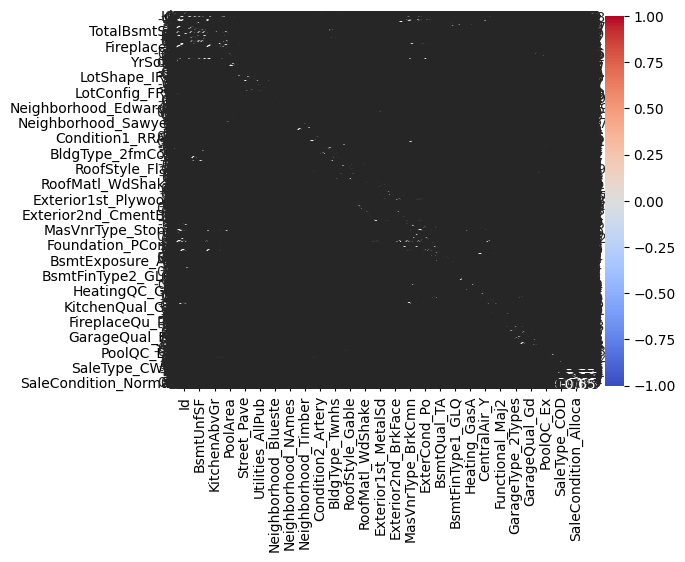

Mean Squared Error: 9.258620067279815e+28
R² Score: -1.2070699233892364e+19
Cross-Validation R² Scores: [-1.00123530e+25 -1.81005247e+19 -2.29626647e+20 -1.47441046e+22
 -8.44394965e+23]
Mean Cross-Validation R² Score: -2.1743479681201173e+24


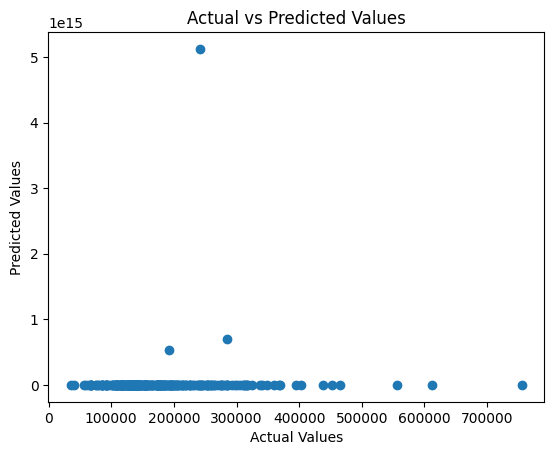

In [ ]:
# 1. Setup and Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load and Explore the Dataset
from sklearn.datasets import fetch_openml
data = fetch_openml(name="house_prices", as_frame=True)
df = data.frame

# Perform an exploratory data analysis (EDA)
print(df)
# Convert categorical variables to numerical
df = pd.get_dummies(df)

# Check for any remaining non-numeric columns
print(df.dtypes)

# Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Plot heatmap
sns.heatmap(df_imputed.corr(), annot=True, cmap="coolwarm")
plt.show()

# 3. Data Preprocessing
X = df_imputed.drop("SalePrice", axis=1)
y = df_imputed["SalePrice"]

# Optionally, scale features if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Model Selection and Training
model = LinearRegression()  # You could also try RandomForestRegressor(), etc.
model.fit(X_train, y_train)

# 6. Prediction and Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# 7. Cross-Validation
scores = cross_val_score(model, X_scaled, y, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", scores)
print("Mean Cross-Validation R² Score:", np.mean(scores))

# 8. Visualization of Results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()
